In [8]:
# Import necessary libraries for data handling and plotting
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
# Read the CSV data into a pandas DataFrame
url = 'https://corgis-edu.github.io/corgis/datasets/csv/weather/weather.csv'
df = pd.read_csv(url)
df.head()

,Data.Precipitation,Date.Full,Date.Month,Date.Week of,Date.Year,Station.City,Station.Code,Station.Location,Station.State,Data.Temperature.Avg Temp,Data.Temperature.Max Temp,Data.Temperature.Min Temp,Data.Wind.Direction,Data.Wind.Speed
0,0.00,2016-01-03,1,3,2016,Birmingham,BHM,"Birmingham, AL",Alabama,39,46,32,33,4.33
1,0.00,2016-01-03,1,3,2016,Huntsville,HSV,"Huntsville, AL",Alabama,39,47,31,32,3.86
2,0.16,2016-01-03,1,3,2016,Mobile,MOB,"Mobile, AL",Alabama,46,51,41,35,9.73
3,0.00,2016-01-03,1,3,2016,Montgomery,MGM,"Montgomery, AL",Alabama,45,52,38,32,6.86
4,0.01,2016-01-03,1,3,2016,Anchorage,ANC,"Anchorage, AK",Alaska,34,38,29,19,7.80


In [7]:
# Convert columns to numeric types. Any value that cannot be converted will become NaN (Not a Number).
df['Data.Precipitation'] = pd.to_numeric(df['Data.Precipitation'], errors='coerce')
df['Data.Temperature.Avg Temp'] = pd.to_numeric(df['Data.Temperature.Avg Temp'], errors='coerce')
df['Data.Wind.Speed'] = pd.to_numeric(df['Data.Wind.Speed'], errors='coerce')

# Drop any rows that have missing values in our key columns after conversion.
df.dropna(subset=['Data.Precipitation', 'Data.Temperature.Avg Temp', 'Data.Wind.Speed', 'Station.State'], inplace=True)


/var/folders/yb/whx8945s5njbtn9r4cvptpd80000gn/T/ipykernel_84908/3080005379.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.head(10).index, y=state_counts.head(10).values, palette='viridis')


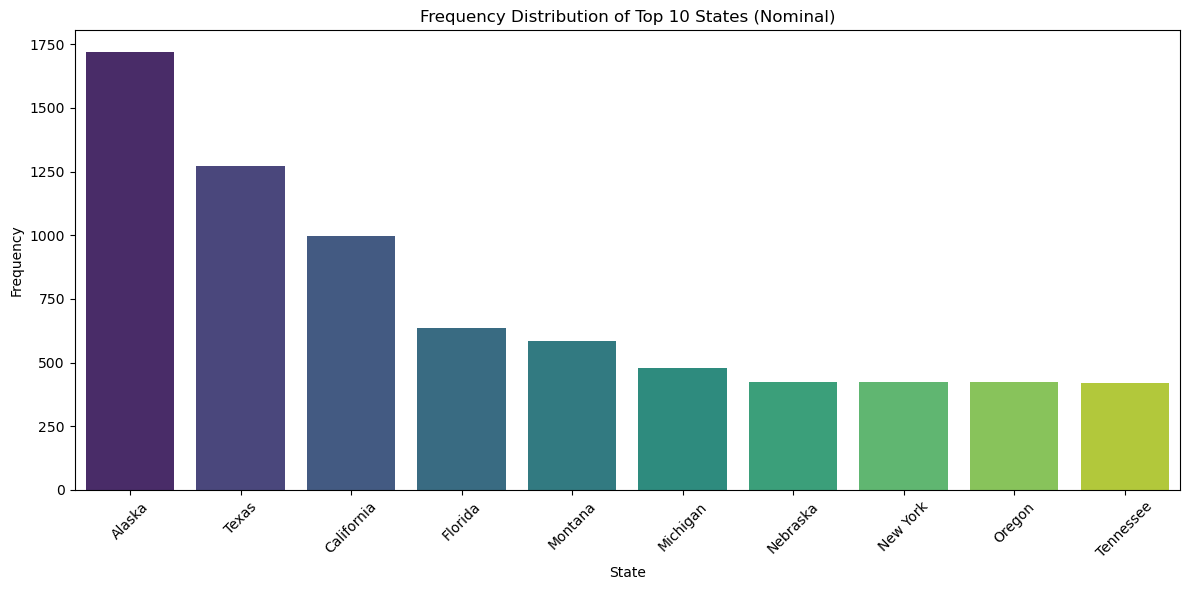

In [9]:

# --- 2. Nominal Variable Analysis: Station.State ---
# Formula/Function: Get frequency counts for the 'Station.State' column.
state_counts = df['Station.State'].value_counts()

# Code for Figure 1: Generate a bar plot for the top 10 states.
plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts.head(10).index, y=state_counts.head(10).values, palette='viridis')
plt.title('Frequency Distribution of Top 10 States (Nominal)')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

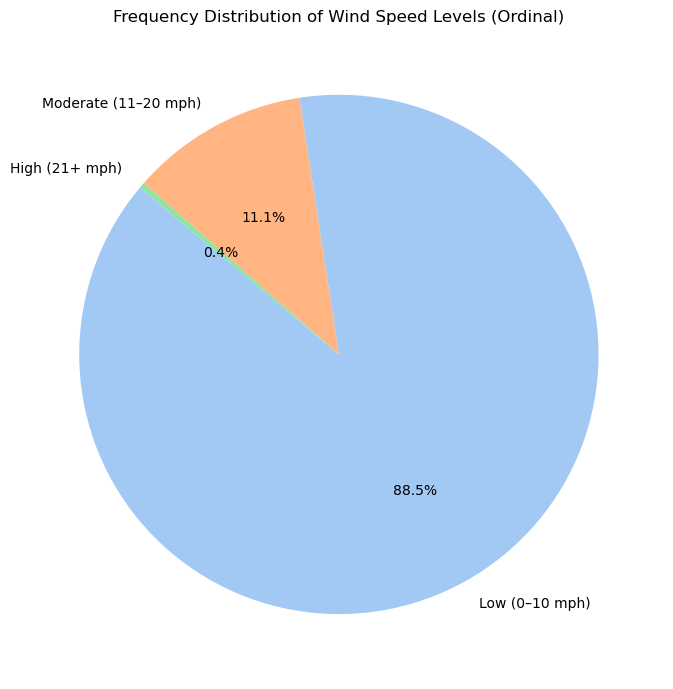

In [12]:
# Categorize wind speed into ordinal levels
wind_speed_bins = [0, 10, 20, float('inf')]
wind_speed_labels = ['Low (0–10 mph)', 'Moderate (11–20 mph)', 'High (21+ mph)']
df['Wind Speed Level'] = pd.cut(df['Data.Wind.Speed'], bins=wind_speed_bins, labels=wind_speed_labels, right=True, include_lowest=True)

# Get frequency counts for each wind speed level
wind_speed_counts = df['Wind Speed Level'].value_counts().sort_index()

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(wind_speed_counts, labels=wind_speed_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
plt.title('Frequency Distribution of Wind Speed Levels (Ordinal)')
plt.tight_layout()
plt.show()

In [16]:
from scipy import stats

mean = avg_temp_stats['mean']
median = avg_temp_stats['50%']
mode = stats.mode(df['Data.Temperature.Avg Temp'], keepdims=True)[0][0]
std_dev = avg_temp_stats['std']
variance = df['Data.Temperature.Avg Temp'].var()

print(f"Mean: {mean:.2f}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"Variance: {variance:.2f}")

Mean: 56.09
Median: 58.0
Mode: 60
Standard Deviation: 18.80
Variance: 353.38


In [17]:
# Display summary statistics for the interval variable (Average Temperature) as a table
summary_dict = {
    'Count': avg_temp_stats['count'],
    'Mean': mean,
    'Median': median,
    'Mode': mode,
    'Std Dev': std_dev,
    'Variance': variance,
    'Min': avg_temp_stats['min'],
    '25%': avg_temp_stats['25%'],
    '50%': avg_temp_stats['50%'],
    '75%': avg_temp_stats['75%'],
    'Max': avg_temp_stats['max']
}

summary_table = pd.DataFrame(summary_dict, index=['Data.Temperature.Avg Temp']).T
print("Summary Statistics Table for Data.Temperature.Avg Temp (Interval Variable):")
display(summary_table)

Summary Statistics Table for Data.Temperature.Avg Temp (Interval Variable):


,Data.Temperature.Avg Temp
Count,16743.000000
Mean,56.089112
Median,58.000000
Mode,60.000000
Std Dev,18.798295
Variance,353.375884
Min,-27.000000
25%,44.000000
50%,58.000000
75%,71.000000


In [19]:
# Text insight for the Summary Statistics Table for Data.Temperature.Avg Temp (Interval Variable)
insight = (
    f"The average temperature across all records is {mean:.2f}°F, with a median of {median}°F and a mode of {mode}°F, "
    f"indicating that most temperatures cluster around the upper 50s. The temperature values range from a minimum of {avg_temp_stats['min']}°F "
    f"to a maximum of {avg_temp_stats['max']}°F, showing a wide spread. The standard deviation is {std_dev:.2f}, and the variance is {variance:.2f}, "
    f"suggesting moderate variability in temperature readings. The interquartile range (25% to 75%) spans from {avg_temp_stats['25%']}°F to {avg_temp_stats['75%']}°F, "
    f"highlighting where the central half of the data lies."
)
print(insight)

The average temperature across all records is 56.09°F, with a median of 58.0°F and a mode of 60°F, indicating that most temperatures cluster around the upper 50s. The temperature values range from a minimum of -27.0°F to a maximum of 100.0°F, showing a wide spread. The standard deviation is 18.80, and the variance is 353.38, suggesting moderate variability in temperature readings. The interquartile range (25% to 75%) spans from 44.0°F to 71.0°F, highlighting where the central half of the data lies.


In [18]:
# Calculate summary statistics for precipitation
precip_stats = df['Data.Precipitation'].describe()
precip_mean = precip_stats['mean']
precip_median = precip_stats['50%']
precip_mode = df['Data.Precipitation'].mode()[0]
precip_std = precip_stats['std']
precip_var = df['Data.Precipitation'].var()
precip_min = precip_stats['min']
precip_25 = precip_stats['25%']
precip_75 = precip_stats['75%']
precip_max = precip_stats['max']
precip_count = precip_stats['count']

# Create summary table
precip_summary_dict = {
    'Count': precip_count,
    'Mean': precip_mean,
    'Median': precip_median,
    'Mode': precip_mode,
    'Std Dev': precip_std,
    'Variance': precip_var,
    'Min': precip_min,
    '25%': precip_25,
    '75%': precip_75,
    'Max': precip_max
}
precip_summary_table = pd.DataFrame(precip_summary_dict, index=['Data.Precipitation']).T

# Display with professional color styling
def style_precip_table(df):
    return df.style.set_properties(**{
        'background-color': '#f5f7fa',  # light professional blue-gray
        'color': '#222',
        'border-color': '#b3c6e0'
    }).set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#2e86c1'), ('color', 'white'), ('font-weight', 'bold')]},
        {'selector': 'td', 'props': [('border', '1px solid #b3c6e0')]}
    ])

display(style_precip_table(precip_summary_table))

,Data.Precipitation
Count,16743.000000
Mean,0.579090
Median,0.190000
Mode,0.000000
Std Dev,0.988057
Variance,0.976257
Min,0.000000
25%,0.000000
75%,0.750000
Max,20.890000


In [20]:
# The existing insight text provides a complete analysis:
print("Based on the precipitation summary statistics:")
precip_insight = (
    f"The precipitation data shows an average of {precip_mean:.2f} inches, with a median of {precip_median:.2f} inches. "
    f"The values range from {precip_min:.2f} to {precip_max:.2f} inches, with 50% of the data falling between "
    f"{precip_25:.2f} and {precip_75:.2f} inches. The standard deviation of {precip_std:.2f} and mode of {precip_mode:.2f} "
    f"indicate that precipitation amounts are right-skewed, with many days having little to no precipitation and fewer days with heavy rainfall."
)
print(precip_insight)

Based on the precipitation summary statistics:
The precipitation data shows an average of 0.58 inches, with a median of 0.19 inches. The values range from 0.00 to 20.89 inches, with 50% of the data falling between 0.00 and 0.75 inches. The standard deviation of 0.99 and mode of 0.00 indicate that precipitation amounts are right-skewed, with many days having little to no precipitation and fewer days with heavy rainfall.
